**Chapter 01. 학습 데이터셋과 시험 데이터셋**

In [28]:
import csv
from hashlib import algorithms_available

f = open("Fish.csv")
data = csv.reader(f)

header = next(data)

bream_weight = []
bream_length = []

smelt_weight = []
smelt_length = []

for row in data:
    row[1] = float(row[1])
    row[3] = float(row[3])

    if(row[0] == "Bream"):
        bream_weight.append(row[1])
        bream_length.append(row[3])
    elif(row[0] == "Smelt"):
        smelt_weight.append(row[1])
        smelt_length.append(row[3])

f.close()

length = bream_length + smelt_length
weight = bream_weight + smelt_weight


x = [[l, w] for l, w in zip(length, weight)]
y = [1] * 35 + [0] * 14

print(x)
print(y)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
#어케구분할것인가? 7에서 총 3가지 방법을 살펴봄

# 학습& 시험 데이터셋을 구성할 때 방법 1(잘못된 방법.)
#슬라이싱 이용해서 앞에는 학습용, 뒤에는 시험용.

x_train = x[:35]
y_train = y[:35]

x_test = x[35:]
y_test = y[35:]

In [30]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
result = kn.score(x_test, y_test)
print("정확도(Accuracy):", result)

정확도(Accuracy): 0.0


In [32]:
import numpy as np # Numerical Python --> NumPy (alias)

print(type(x))

x_arr = np.array(x) #n-dimensional array(n차원 배열)
y_arr = np.array(y)

print(x_arr)
print(y_arr)

<class 'list'>
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
print(x_arr.shape)
print(y_arr.shape)

(49, 2)
(49,)


In [34]:
np.random.seed(42)
index = np.arange(0, 49, 1)
print("Before:", index)

Before: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [35]:
np.random.shuffle(index)
print("after", index)

after [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [61]:
x_train = x_arr[index[0:35]]
y_train = y_arr[index[0:35]]

x_test = x_arr[index[35:]]
y_test = y_arr[index[35:]]

print(type(x_train))
#print(y_train)
print(type(x_test))
#print(y_text)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


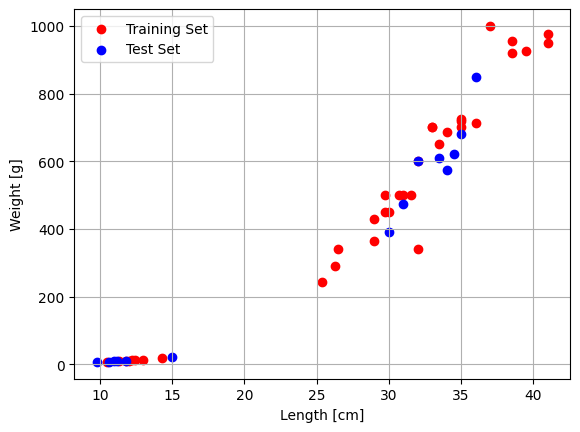

In [64]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x_train[:35, 0], x_train[0:35, 1],c='red', label="Training Set")
plt.scatter(x_test[:14, 0], x_test[0:14, 1],c='blue', label="Test Set")
plt.legend()    #n. 전설, 범례
#plt.scatter(x_test[0:14, 0], x_test[0:14, 1])

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid()

plt.show()

In [65]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [66]:
result = kn.score(x_test, y_test)
print(result)

1.0


In [70]:

y_pred = kn.predict(x_test)
print("모델이 예측한 값:", y_pred)
print("   실제 정답 값:", y_test)

모델이 예측한 값: [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
   실제 정답 값: [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
